Dans cette leçon, nous aborderons un ensemble de données du monde réel. Nous utiliserons les bibliothèques python (Pandas, NumPy, Matplotlib) pour analyser un ensemble de données sur **les propriétés chimiques du vin** et **leurs scores de qualité associés**. Dans cette leçon, vous pourrez acquérir une expérience pratique concernant :

    L'évaluation et le nettoyage des données
    L'ingénierie des caractéristiques
    La visualisation de vos résultats
    

## Rappel sur le processus d'analyse de données :

### Questionnement --> Acquisition (Collecte, Évaluation, Nettoyage) --> Analyse (Statistiques, Visualisations)
###  --> Conclusions --> Partage des résultats

## 1. Aperçu des données

Attributs de chaque ensemble de données :

### Propriétés physico-chimiques

1. Acidité fixe
2. 	Acidité volatile
3. 	Acide citrique
4. 	Sucre résiduel
5. 	Chlorures
6. 	Dioxyde de soufre libre
7. 	Dioxyde de soufre total
8. 	Densité
9. 	pH
10. Sulfites
11. Alcool

### Cote de qualité
12. Qualité - Note entre 0 et 10 (médiane d'au moins 3 évaluations effectuées par des experts)

## 2. Poser des questions

- Quelles sont les caractéristiques chimiques les plus importantes pour prédire la qualité du vin ?
- Y a-t-il un certain type de vins (rouge ou blanc) associé à une qualité supérieure ?
- Les vins les plus alcoolisés sont-ils mieux notés ?
- Les vins plus sucrés reçoivent-ils de meilleures notes ?
- Quel est le niveau d'acidité associé à la plus haute qualité ?
- ...

## 3. Acquisition des données

### 3.1. Collecte des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

*Importer le jeu de données sur les vins rouges*

In [2]:
red_wines = pd.read_csv('datasets/winequality-red.csv', sep=';')
red_wines.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


*Importer le jeu de données sur les vins blancs*

In [3]:
white_wines = pd.read_csv('datasets/winequality-white.csv', sep=';')
white_wines.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### 3.2. Évaluation et Nettoyage des données

Dans notre cas il s'agira de chercher les informations suivantes :
- nombre d'échantillons dans chaque ensemble de données
- nombre de colonnes dans chaque ensemble de données
- caractéristiques avec valeurs manquantes
- lignes dupliquées dans l'ensemble de données sur le vin blanc
- nombre de valeurs uniques pour la qualité dans chaque ensemble de données
- densité moyenne de l'ensemble de données sur le vin rouge


In [4]:
# combien ya t-il de vins rouges??
red_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur-dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# le nombre d'ntrées et le nombre de colones
red_wines.shape

(1599, 12)

In [6]:
# le nombre de lignes dupliquées
sum(red_wines.duplicated())

240

In [7]:
red_wines.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [8]:
red_wines[red_wines.duplicated()]
#affiche les lignes dupliquées

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [9]:
# comment supprimer les doublons?
red_wines=red_wines[~red_wines.duplicated()]
sum(red_wines.duplicated())

0

In [10]:
red_wines.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


Nous allons combiner dans un premier temps combiner les deux jeux de données en un seul; avant de le faire nous allons rajouter une colonne à chacun pour garder une trace du type de vin (rouge ou blanc) : 

![Combine wine datasets](basics_images/combine_wine_datasets.png)

Nous utiliserons pour cela `numpy` pour sa rapidité; voici un exemple qui l'illustre : 

In [11]:
from time import time
a = np.random.random(int(1e8))

start = time()
sum(a)/len(a)
print(time() - start, "secondes")

17.93092393875122 secondes


In [12]:
start = time()
np.mean(a)
print(time() - start, "secondes")

0.599966287612915 secondes


*Création des arrays de couleur pour les deux jeux de données*

In [13]:
red_color = np.repeat("red", len(red_wines))
white_color = np.repeat("white",len(white_wines))

In [14]:
red_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [15]:
red_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


*Ajout des colonnes*

In [16]:
red_wines["color"]= red_color
white_wines["color"]= white_color


In [17]:
red_wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur-dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [18]:
# on renomme la colonne sulfur dioxide
red_wines=red_wines.rename(columns={'total_sulfur-dioxide': 'total_sulfur_dioxide'})

*Création du dataframe combiné*

In [19]:
vins=pd.concat([red_wines,white_wines])

In [20]:
vins.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [21]:
vins.shape

(6257, 13)

*Sauvegarde du nouveau jeu de données*

In [22]:
vins.to_csv('datasets/vins.csv', index=False)
# pour ne pas ajouter une nouvelle colonne index (pour les index dans ma liste de données) 

## 4. Explorations avec des visualisations 

### 4.1 Explorations univariées de quelques colonnes

*Histogramme des propriétés suivantes : `Acidité fixe, dioxyde de soufre total, pH, alcool`*

Text(0.5, 0, 'acidité fixe')

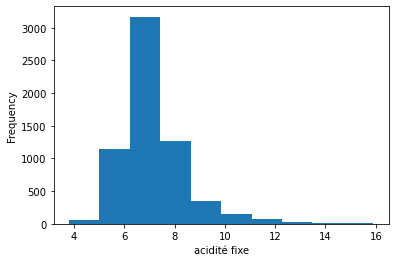

In [23]:
 # acidité fixe
vins['fixed_acidity'].plot(kind='hist')
plt.xlabel('acidité fixe')

Text(0.5, 0, 'dioxide de soufre')

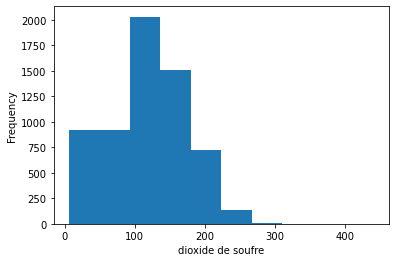

In [24]:
# dioxide de soufre total
vins['total_sulfur_dioxide'].plot(kind='hist')
plt.xlabel('dioxide de soufre')

Text(0.5, 0, 'ph')

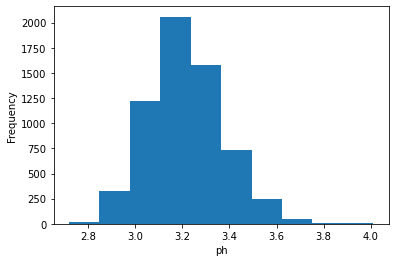

In [25]:
vins['pH'].plot(kind='hist')
plt.xlabel('ph')

### 4.2 Explorations bivariées de quelques colonnes par rapport au score final

*Nuage de points des caractéristiques suivantes par rapport au score final : `Acidité volatile, sucre résiduel, pH, alcool`*

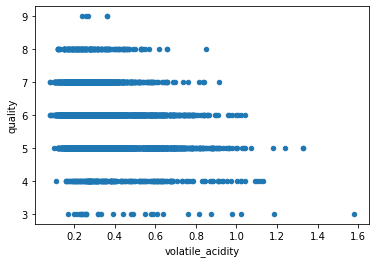

In [26]:
 vins.plot(kind='scatter', x='volatile_acidity', y='quality');

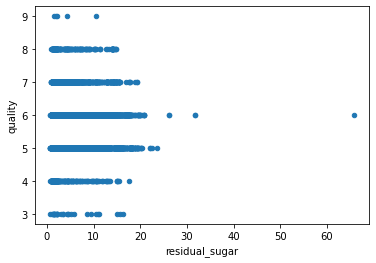

In [27]:
 vins.plot(kind='scatter', x='residual_sugar', y='quality');

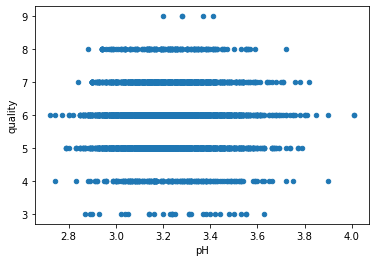

In [28]:
 vins.plot(kind='scatter', x='pH', y='quality');

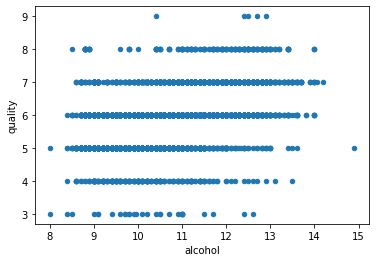

In [29]:
 vins.plot(kind='scatter', x='alcohol', y='quality');

#### fonction `groupby` de pandas

La fonction `groupby` vous permet de regrouper vos données par une ou plusieurs colonnes spécifiques et de créer des informations agrégées sur ces regroupements. Elle permet également des transformations propres à chaque groupe. Dans cette section, nous utiliserons groupby pour obtenir des statistiques récapitulatives sur les différents groupes dans nos données :

##### Q1 : Un certain type de vin (rouge ou blanc) est-il associé à une qualité supérieure ?

In [30]:
vins.groupby('color').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


In [31]:
#en conclusion le vins rouge a une meilleure qualité

##### Q2 : Quel niveau d'acidité (valeur du pH) obtient la cote moyenne la plus élevée ?

In [32]:
# Voir les valeurs min, 25%, 50%, 75%, max du pH avec Pandas describe
vins.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000
mean,7.170984,0.332809,0.320756,5.551295,0.054971,31.091258,118.479623,0.994610,3.214660,0.526522,10.496467,5.822599
std,1.254095,0.161115,0.142880,4.804008,0.034755,17.725684,55.505039,0.002997,0.159927,0.146173,1.200312,0.878767
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.220000,0.250000,1.800000,0.038000,18.000000,84.000000,0.992200,3.100000,0.430000,9.500000,5.000000
50%,6.900000,0.290000,0.310000,3.300000,0.047000,29.000000,120.000000,0.994750,3.200000,0.500000,10.300000,6.000000
75%,7.600000,0.390000,0.390000,8.250000,0.061000,42.000000,157.000000,0.996900,3.320000,0.590000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [33]:
vins.describe()[['pH']]

,pH
count,6257.000000
mean,3.214660
std,0.159927
min,2.720000
25%,3.100000
50%,3.200000
75%,3.320000
max,4.010000


In [34]:
# bords des blocs qui seront utilisés pour "couper" les données en groupes
bin_edges = [2.72,3.1,3.2,3.32,4.01] # à remplir

In [35]:
vins.shape

(6257, 13)

In [36]:
vins.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [37]:
# Labels pour les quatre niveaux d'acidité
bin_names = ['élevé', 'modérément élevé', 'moyen', 'faible']

In [38]:
# Creation de la colonne acidity_levels 
wine_df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)

# Vérification que la colonne a bien été créée
wine_df.head()

NameError: name 'df' is not defined

In [ ]:
# sauvevegarde du fichier
wine_df.to_csv('winequality_edited.csv', index=False)

#### fonction `query` de pandas

##### Q1 : Les vins à teneur plus élevée en alcool sont-ils mieux notés ?

Pour répondre à cette question, utilisons `query` pour créer deux groupes d'échantillons de vin :

- Faible teneur en alcool (échantillons dont la teneur en alcool est inférieure à la médiane)
- Teneur élevée en alcool (échantillons dont la teneur en alcool est supérieure ou égale à la médiane)


##### Q2 : Les vins plus sucrés (plus de sucre résiduel) reçoivent-ils de meilleures notes ?

De la même façon, utilisons la médiane pour diviser les échantillons en deux groupes en fonction du sucre résiduel et trouvons la cote de qualité moyenne de chaque groupe :

#### Tracé de la qualité en fonction du type